In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

pd.set_option("display.precision", 2)

# Creating model object and indicating path
data_path = "../../../../../input/BES/interpreted_seismics_2/horizontes/teste_1/"
nome_modelo = "BES-Seismics-Surfaces-Luis_Teste-1"
geo_model = gp.create_model(nome_modelo)

No module named 'osgeo'


### Detalhes dos dados
- Contém as horizontes geradas pelo Petrel a partir de interpretação sismica
- Todos os horizontes foram reduzidos em X e Y para diminuir a quantidade de pontos (1000). De 386mil pontos para 1112. Quanto mais ponto, mais memoria usa.
- Cada surfaces (surface no GemPy) é uma série
- Ponto de orientação gerado com KNN pelo GemPy (Quando salvar a orientação gerada, precisa trocar o header surfaces para formation, se for abrir o .csv ao invés de rodar sempre o KNN)

## Step by step

In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[430853.235, 474018.154, 7785977.723, 7798430.28, -6544.67, -2566.97],
    resolution=[50, 50, 50],
    path_i=data_path + "surface_points_1000m.csv",
    #path_o=data_path + "orientations_points_2.csv",
)

Active grids: ['regular']


BES-Seismics-Surfaces-Luis_Teste-1  2024-03-25 23:19

In [3]:
gp.get_data(
    geo_model,
    "surfaces",
)

,surface,series,order_surfaces,color,id
0,MAASTRICHTIANO,Default series,1,#015482,1
1,CENOMANIANO,Default series,2,#9f0052,2
2,basement,Basement,1,#ffbe00,3


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_Series_1": ("MAASTRICHTIANO",),
        #"Strat_Series_2": ("TURANIANO",),
        "Strat_Series_3": ("CENOMANIANO",),
        "Basement_series": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,MAASTRICHTIANO,Strat_Series_1,1,#015482,1
1,CENOMANIANO,Strat_Series_3,1,#9f0052,2
2,basement,Basement_series,1,#ffbe00,3


In [5]:
geo_model.series

,order_series,BottomRelation,isActive,isFault,isFinite
Strat_Series_1,1,Erosion,False,False,False
Strat_Series_3,2,Erosion,False,False,False
Basement_series,3,Erosion,False,False,False


In [6]:
geo_model.get_data()

X         Y        Z    smooth         surface   
surface_points 0     431215.58  7.80e+06 -2784.95  2.00e-06  MAASTRICHTIANO  \
               1     432015.62  7.80e+06 -2833.81  2.00e-06  MAASTRICHTIANO   
               2     433015.66  7.80e+06 -2896.70  2.00e-06  MAASTRICHTIANO   
               3     434015.71  7.80e+06 -2958.58  2.00e-06  MAASTRICHTIANO   
               4     435015.75  7.80e+06 -3020.15  2.00e-06  MAASTRICHTIANO   
...                        ...       ...      ...       ...             ...   
               1106  470005.47  7.79e+06 -5742.88  2.00e-06     CENOMANIANO   
               1107  471005.52  7.79e+06 -5879.33  2.00e-06     CENOMANIANO   
               1108  472005.56  7.79e+06 -5994.45  2.00e-06     CENOMANIANO   
               1109  473005.61  7.79e+06 -6065.91  2.00e-06     CENOMANIANO   
               1110  474005.65  7.79e+06 -6137.75  2.00e-06     CENOMANIANO   

                     G_x  G_y  G_z  
surface_points 0     NaN  NaN  NaN  
               1     NaN  NaN  NaN  
               2     NaN  NaN  NaN  
               3     NaN  NaN  NaN  
               4     NaN  NaN  NaN  
...                  ...  ...  ...  
               1106  NaN  NaN  NaN  
               1107  NaN  NaN  NaN  
               1108  NaN  NaN  NaN  
               1109  NaN  NaN  NaN  
               1110  NaN  NaN  NaN  

[1111 rows x 8 columns]

- Precisar criar os pontos de orientação com o código abaixo

In [7]:
neighbours = gp.select_nearest_surfaces_points(geo_model, geo_model.surface_points.df, 10)
opoints = gp.set_orientation_from_neighbours_all(geo_model, neighbours)

In [8]:
geo_model.get_data()

X         Y        Z    smooth         surface   
surface_points 0    431215.58  7.80e+06 -2784.95  2.00e-06  MAASTRICHTIANO  \
               1    432015.62  7.80e+06 -2833.81  2.00e-06  MAASTRICHTIANO   
               2    433015.66  7.80e+06 -2896.70  2.00e-06  MAASTRICHTIANO   
               3    434015.71  7.80e+06 -2958.58  2.00e-06  MAASTRICHTIANO   
               4    435015.75  7.80e+06 -3020.15  2.00e-06  MAASTRICHTIANO   
...                       ...       ...      ...       ...             ...   
orientations   490  470005.47  7.79e+06 -5742.88  1.00e-02     CENOMANIANO   
               491  471005.52  7.79e+06 -5879.33  1.00e-02     CENOMANIANO   
               492  472005.56  7.79e+06 -5994.45  1.00e-02     CENOMANIANO   
               493  473005.61  7.79e+06 -6065.91  1.00e-02     CENOMANIANO   
               494  474005.65  7.79e+06 -6137.75  1.00e-02     CENOMANIANO   

                     G_x       G_y   G_z  
surface_points 0     NaN       NaN   NaN  
               1     NaN       NaN   NaN  
               2     NaN       NaN   NaN  
               3     NaN       NaN   NaN  
               4     NaN       NaN   NaN  
...                  ...       ...   ...  
orientations   490  0.10  6.17e-02  0.99  
               491  0.09  3.21e-02  1.00  
               492  0.08  1.48e-02  1.00  
               493  0.06 -2.52e-03  1.00  
               494  0.07 -3.46e-03  1.00  

[2222 rows x 8 columns]

In [9]:
# Salvando os pontos de orientação gerados pelo KNN (K=10)
orientations_p = geo_model.orientations.df
orientations_p.to_csv(data_path + "orientations_points.csv")
orientations_p

,X,Y,Z,X_c,Y_c,Z_c,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series,smooth
495,431215.58,7.80e+06,-2784.95,0.25,0.57,0.52,0.06,3.11e-03,1.00,3.69,87.23,1.0,MAASTRICHTIANO,Strat_Series_1,1.0,1.0,0.01
496,432015.62,7.80e+06,-2833.81,0.26,0.57,0.52,0.06,2.30e-03,1.00,3.62,87.91,1.0,MAASTRICHTIANO,Strat_Series_1,1.0,1.0,0.01
497,433015.66,7.80e+06,-2896.70,0.28,0.57,0.52,0.06,7.48e-04,1.00,3.61,89.32,1.0,MAASTRICHTIANO,Strat_Series_1,1.0,1.0,0.01
498,434015.71,7.80e+06,-2958.58,0.29,0.57,0.52,0.06,-1.83e-03,1.00,3.56,91.69,1.0,MAASTRICHTIANO,Strat_Series_1,1.0,1.0,0.01
499,435015.75,7.80e+06,-3020.15,0.30,0.57,0.52,0.06,-3.37e-03,1.00,3.54,93.13,1.0,MAASTRICHTIANO,Strat_Series_1,1.0,1.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,470005.47,7.79e+06,-5742.88,0.70,0.43,0.49,0.10,6.17e-02,0.99,6.58,57.43,1.0,CENOMANIANO,Strat_Series_3,2.0,2.0,0.01
491,471005.52,7.79e+06,-5879.33,0.72,0.43,0.48,0.09,3.21e-02,1.00,5.58,70.73,1.0,CENOMANIANO,Strat_Series_3,2.0,2.0,0.01
492,472005.56,7.79e+06,-5994.45,0.73,0.43,0.48,0.08,1.48e-02,1.00,4.83,79.92,1.0,CENOMANIANO,Strat_Series_3,2.0,2.0,0.01
493,473005.61,7.79e+06,-6065.91,0.74,0.43,0.48,0.06,-2.52e-03,1.00,3.70,92.23,1.0,CENOMANIANO,Strat_Series_3,2.0,2.0,0.01


In [10]:
# Trocando o nome de surface para formation (necessário se for importar no Gempy)
orientations_p_formation = orientations_p.copy()
orientations_p_formation = orientations_p_formation.rename(columns={'surface': 'formation'})
orientations_p_formation.to_csv(data_path + "orientations_points_2.csv")
orientations_p_formation

,X,Y,Z,X_c,Y_c,Z_c,G_x,G_y,G_z,dip,azimuth,polarity,formation,series,id,order_series,smooth
495,431215.58,7.80e+06,-2784.95,0.25,0.57,0.52,0.06,3.11e-03,1.00,3.69,87.23,1.0,MAASTRICHTIANO,Strat_Series_1,1.0,1.0,0.01
496,432015.62,7.80e+06,-2833.81,0.26,0.57,0.52,0.06,2.30e-03,1.00,3.62,87.91,1.0,MAASTRICHTIANO,Strat_Series_1,1.0,1.0,0.01
497,433015.66,7.80e+06,-2896.70,0.28,0.57,0.52,0.06,7.48e-04,1.00,3.61,89.32,1.0,MAASTRICHTIANO,Strat_Series_1,1.0,1.0,0.01
498,434015.71,7.80e+06,-2958.58,0.29,0.57,0.52,0.06,-1.83e-03,1.00,3.56,91.69,1.0,MAASTRICHTIANO,Strat_Series_1,1.0,1.0,0.01
499,435015.75,7.80e+06,-3020.15,0.30,0.57,0.52,0.06,-3.37e-03,1.00,3.54,93.13,1.0,MAASTRICHTIANO,Strat_Series_1,1.0,1.0,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,470005.47,7.79e+06,-5742.88,0.70,0.43,0.49,0.10,6.17e-02,0.99,6.58,57.43,1.0,CENOMANIANO,Strat_Series_3,2.0,2.0,0.01
491,471005.52,7.79e+06,-5879.33,0.72,0.43,0.48,0.09,3.21e-02,1.00,5.58,70.73,1.0,CENOMANIANO,Strat_Series_3,2.0,2.0,0.01
492,472005.56,7.79e+06,-5994.45,0.73,0.43,0.48,0.08,1.48e-02,1.00,4.83,79.92,1.0,CENOMANIANO,Strat_Series_3,2.0,2.0,0.01
493,473005.61,7.79e+06,-6065.91,0.74,0.43,0.48,0.06,-2.52e-03,1.00,3.70,92.23,1.0,CENOMANIANO,Strat_Series_3,2.0,2.0,0.01


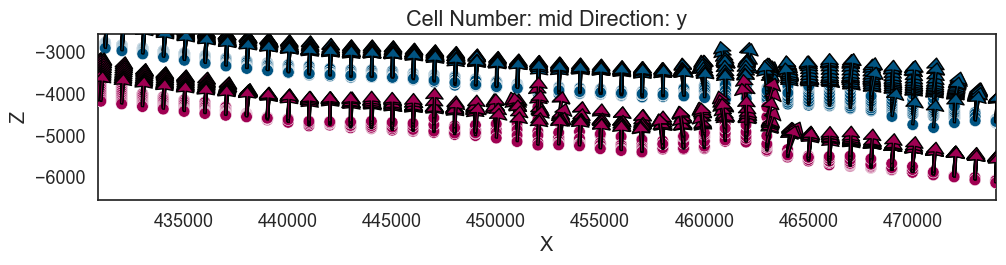

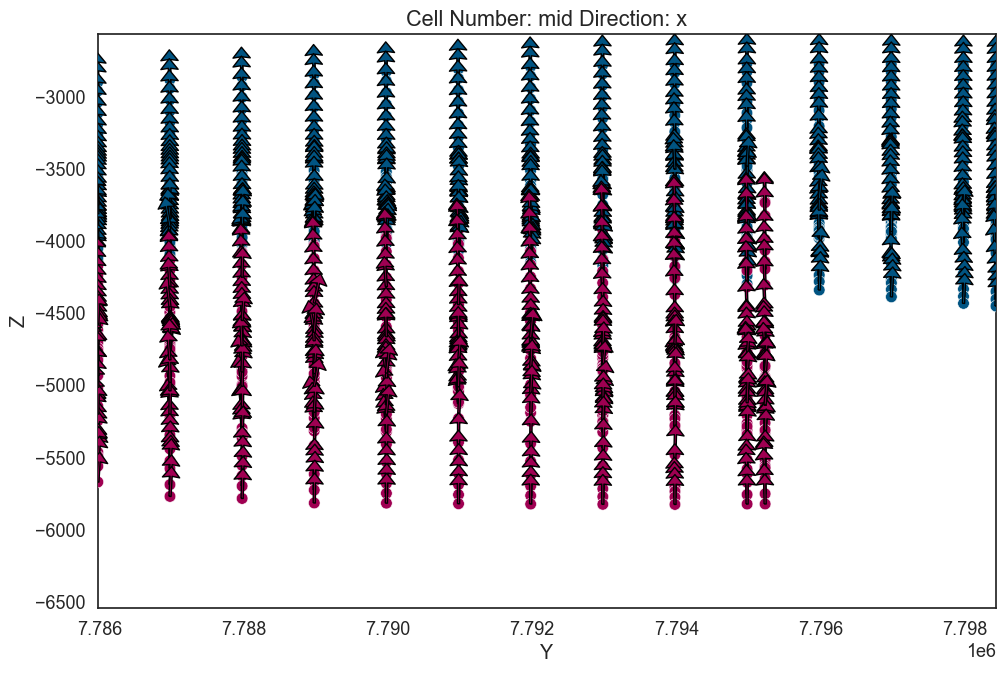

In [11]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="y", show_data=True, show_lith=True, ve=2, legend=False)
gp.plot_2d(geo_model, direction="x", show_data=True, show_lith=True, ve=2, legend=False)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [12]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="background",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=5,
)

In [13]:
%%time
gp.set_interpolator(
    geo_model, 
    output=['geology'], 
    compile_theano=True, 
    theano_optimizer='fast_run', # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[]
)

Setting kriging parameters to their default values.
Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                      values
range              45100.98
$C_o$            48430916.8
drift equations   [3, 3, 3]
CPU times: total: 19.6 s
Wall time: 20.5 s


In [14]:
geo_model.update_to_interpolator()

True

In [15]:
%%time
gp.compute_model(
    geo_model, 
    compute_mesh=True,
    )

CPU times: total: 5min 58s
Wall time: 1min 10s



Lithology ids 
  [3. 3. 3. ... 1. 1. 1.] 

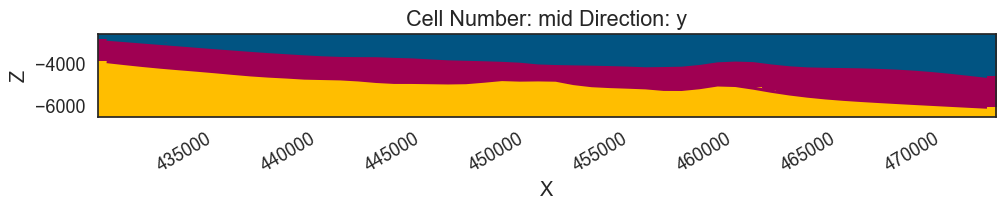

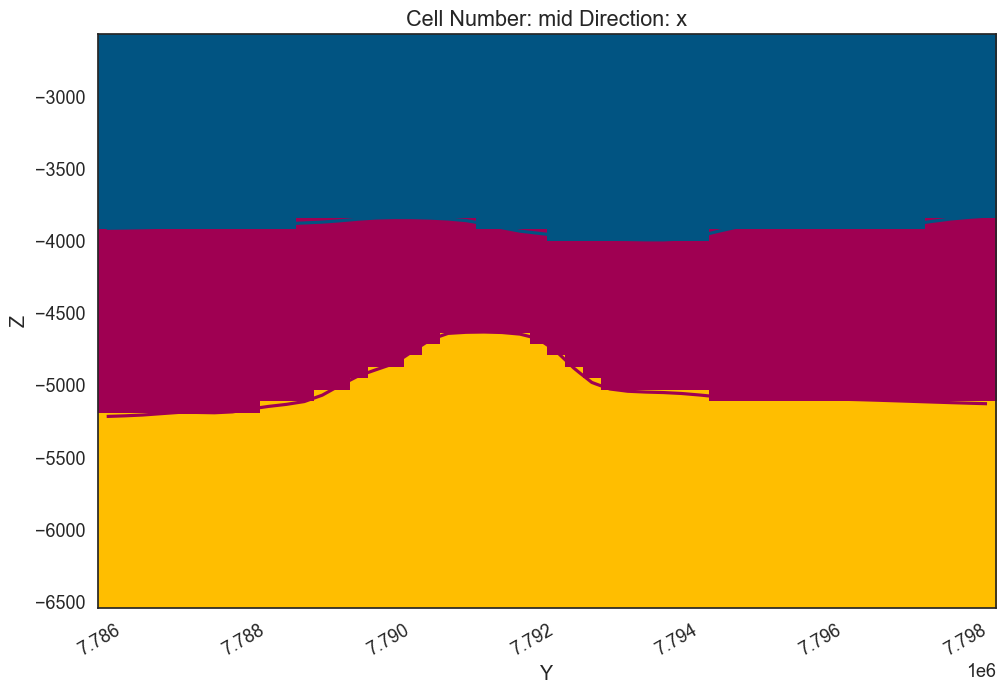

In [16]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=2,
    legend=True,
)

In [17]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=False, ve=5)

In [18]:
topo_init = tp.compute_topology(
    geo_model, direction="x", voxel_threshold=1
)  # , direction="Y", cell_number=15)
edges_init, centroids_init = tp.clean_unconformity_topology(
    geo_model, 1, topo_init[0], topo_init[1]
)

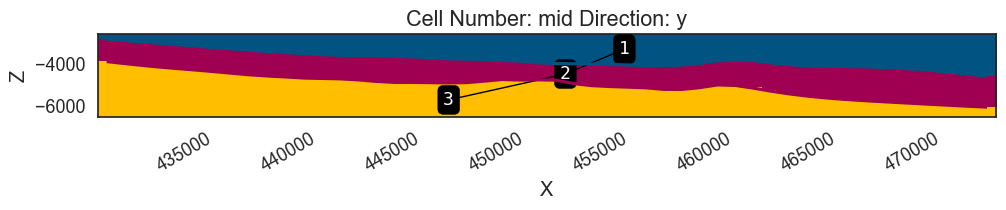

In [19]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=1,
)
gp.plot.plot_topology(geo_model, edges_init, centroids_init)

- Salvando pelo GemPy e em pickle

In [20]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    compress=True,
)

True

In [21]:
import pickle
save_path = "../../../../../output/BES/interpreted_seismics_teste_1/"
with open(save_path + nome_modelo, "wb") as f:
    pickle.dump(geo_model, f)